In [147]:
# Nomor 2:
# basic
import numpy as np
import pandas as pd
from itertools import combinations
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
# split
from sklearn.model_selection import train_test_split
# elbow
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
#clustering
import pyclustering
from pyclustering.utils import read_sample, distance_metric, type_metric
from pyclustering.samples.definitions import FAMOUS_SAMPLES
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from sklearn_extra.cluster import KMedoids
from sklearn.pipeline import make_pipeline

In [35]:
# read data
df_iris = pd.read_csv(r'D:\UIN\BigData\UAS\dataset\Iris.csv')
print('jumlah data = ', len(df_iris['Id']))
print(df_iris.columns)
print(df_iris.dtypes)
print(df_iris)

jumlah data =  150
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0 

In [36]:
# normalisasi
def min_max_scaler(df):
    for column in df.columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
    return (df)

### a. Apa pra-proses yg cocok dilakukan untuk dataset tersebut

In [37]:
# https://medium.com/@awaisafzal0/data-preprocessing-of-iris-data-set-ef52d0f31409
# https://www.kaggle.com/ash316/ml-from-scratch-with-iris

# hapus kolom Id karena tidak digunakan
df_iris_copy = df_iris.copy()
df_species = df_iris['Species'].copy()
df_iris = df_iris.drop(['Id', 'Species'], axis=1)

# merubah species (kategorikal) menjadi numerik kode
df_species = df_species.astype('category')
df_species = df_species.cat.codes

# normalisasi
df_iris = min_max_scaler(df_iris)
print(df_iris)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0.222222      0.625000       0.067797      0.041667
1         0.166667      0.416667       0.067797      0.041667
2         0.111111      0.500000       0.050847      0.041667
3         0.083333      0.458333       0.084746      0.041667
4         0.194444      0.666667       0.067797      0.041667
..             ...           ...            ...           ...
145       0.666667      0.416667       0.711864      0.916667
146       0.555556      0.208333       0.677966      0.750000
147       0.611111      0.416667       0.711864      0.791667
148       0.527778      0.583333       0.745763      0.916667
149       0.444444      0.416667       0.694915      0.708333

[150 rows x 4 columns]


<ipython-input-38-dd573be1c1b4>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_iris.hist(ax = ax, column = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

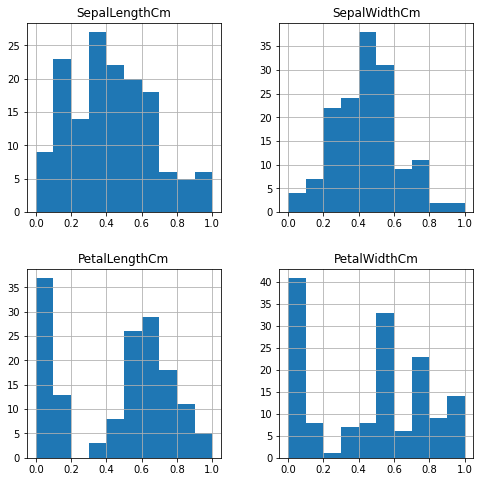

In [38]:
# hist
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df_iris.hist(ax = ax, column = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is 

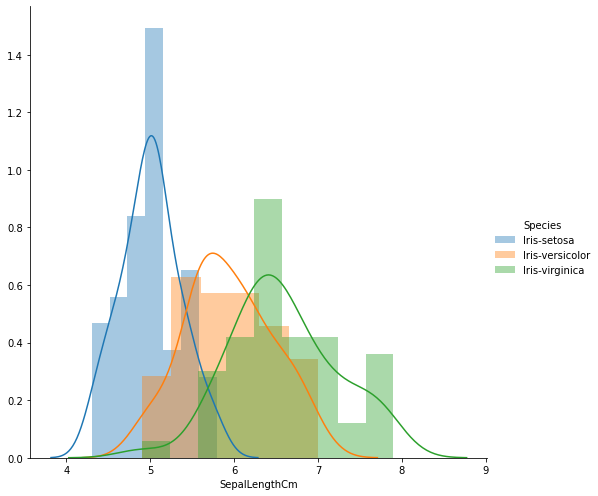

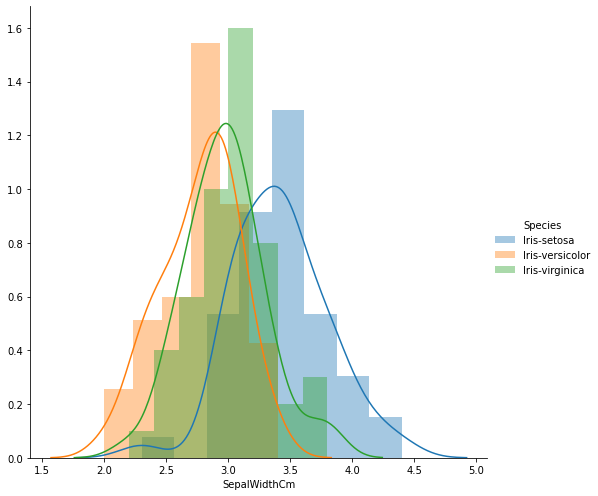

In [39]:
sns.FacetGrid(df_iris_copy,hue='Species',size=7).map(sns.distplot,'SepalLengthCm').add_legend()
sns.FacetGrid(df_iris_copy,hue='Species',height=7).map(sns.distplot,'SepalWidthCm').add_legend()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is 

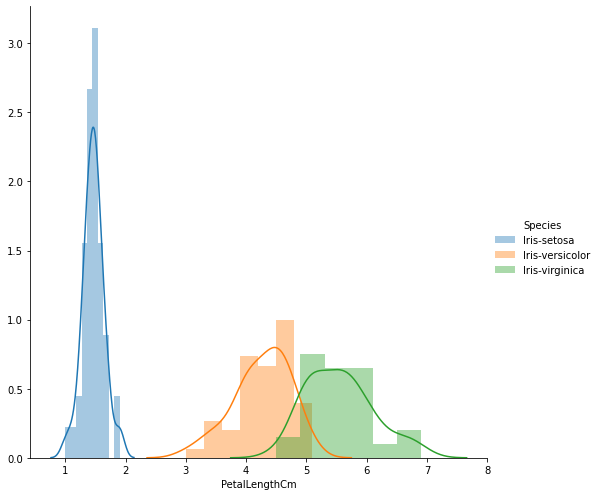

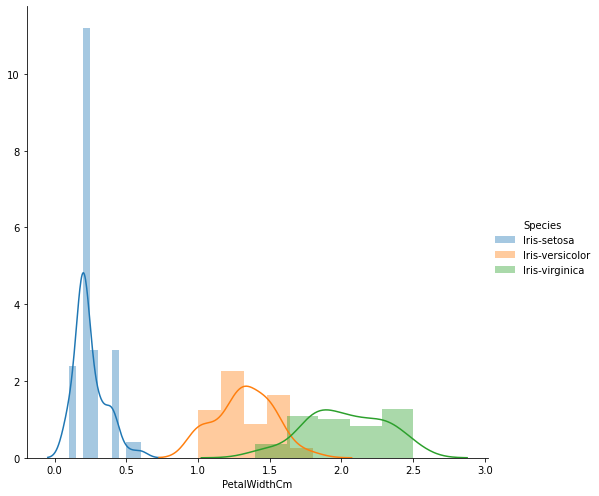

In [40]:
sns.FacetGrid(df_iris_copy,hue='Species',size=7).map(sns.distplot,'PetalLengthCm').add_legend()
sns.FacetGrid(df_iris_copy,hue='Species',height=7).map(sns.distplot,'PetalWidthCm').add_legend()

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


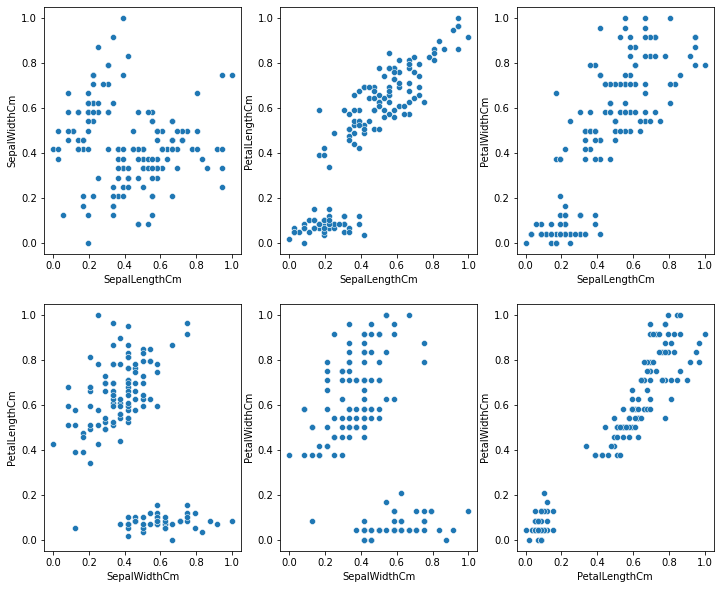

In [41]:
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

n = range(0, len(num_cols))
perm = list(combinations(n, 2))
print(perm)
num = 1
fig = plt.figure(figsize = (12,10))

for i in perm:
    plt.subplot(2, 3, num)
    num += 1
    sns.scatterplot(x = df_iris[num_cols[i[0]]], y = df_iris[num_cols[i[1]]])

plt.show()

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\l

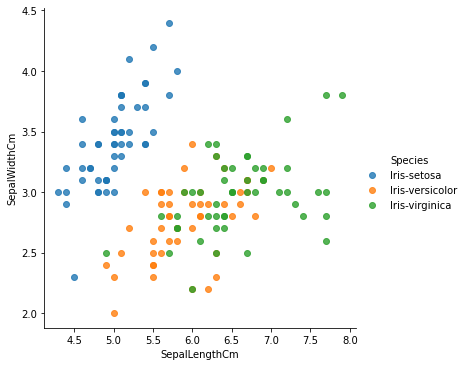

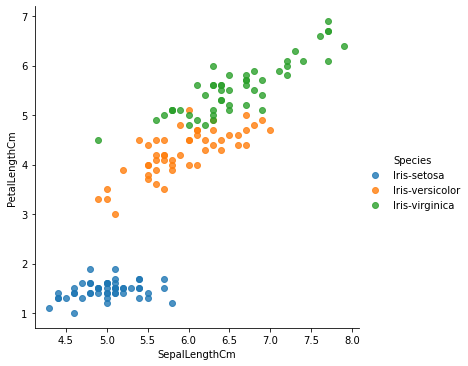

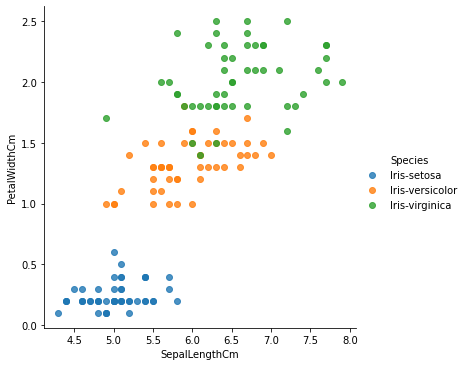

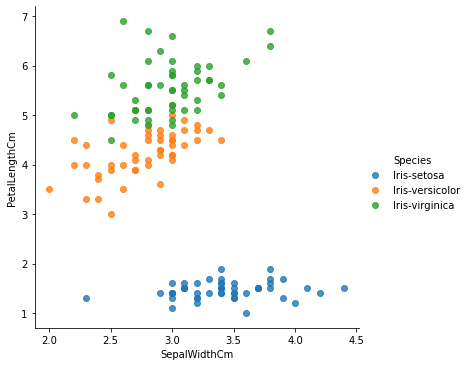

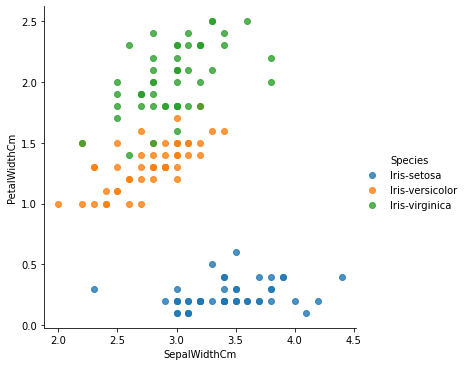

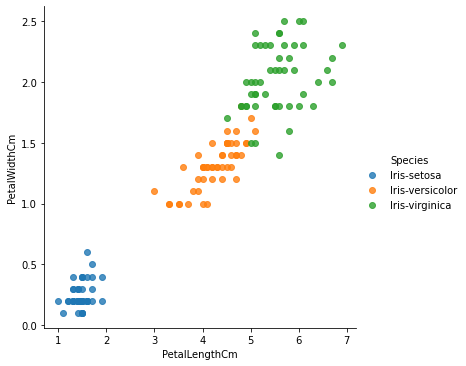

In [42]:
# sns.lmplot('PetalLengthCm','PetalWidthCm',hue='Species',data=df_iris,fit_reg=False)
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

n = range(0, len(num_cols))
perm = list(combinations(n, 2))
print(perm)
num = 1

for i in perm:
    num += 1
    sns.lmplot(num_cols[i[0]],num_cols[i[1]],hue='Species',data=df_iris_copy,fit_reg=False)

plt.show()

<AxesSubplot:>

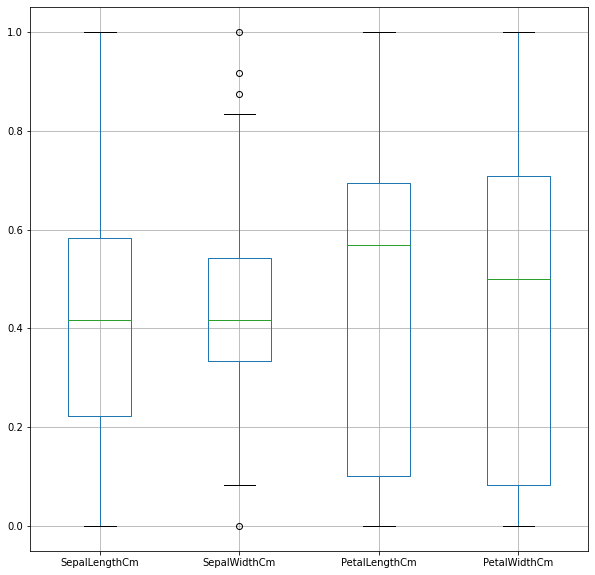

In [29]:
# Barplot
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_iris.boxplot(ax = ax, column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
# print(df_iris.columns)

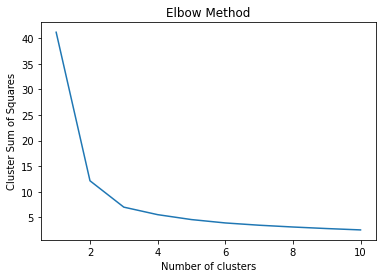

In [30]:
# Elbow

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_iris)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum of Squares') #within cluster sum of squares
plt.show()

In [44]:
# ubah dataframe menjadi list
list_iris = df_iris.values.tolist()

### b. Pilih dua metode pembagian data. Kemudian jelaskan alasan menggunakan metode tersebut.

In [45]:
# https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn
# metode (train, test)
X = list_iris
y = df_species.values

# Split validasi (train 20%, test 20%)
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(X, y, test_size=0.2, random_state=1)


In [171]:
# cross validation
x_np = np.array(X)
y_np = np.array(y)

# Create an instance of Pipeline
# pipeline = make_pipeline(RandomForestClassifier(n_estimators=100, max_depth=4))
pipeline = make_pipeline(KMeans(n_clusters=3, random_state=0))

kf = KFold(n_splits=5, random_state=1) 
kfold = kf.split(df_iris, df_species)

train_index = [0]
test_index = [0]


for k, (train, test) in enumerate(kfold):
    pipeline.fit(df_iris.iloc[train, :], df_species.iloc[train])
    score = pipeline.score(df_iris.iloc[test, :], df_species.iloc[test])
    print('Fold: %2d, Training/Test Split Distribution: s, Accuracy: %.3f' % (k+1,  score))
    if(k+1 == 5):
        print(test)
        train_index = train
        test_index = test
        
print(len(train_index))
print(len(test_index))

X_train_cv = df_iris.iloc[train_index, :].values.tolist()
X_test_cv = df_iris.iloc[test_index, : ].values.tolist()
y_train_cv = df_species.iloc[train_index].values.tolist()
y_test_cv = df_species.iloc[test_index].values.tolist()

Fold:  1, Training/Test Split Distribution: s, Accuracy: -1.047
Fold:  2, Training/Test Split Distribution: s, Accuracy: -1.541
Fold:  3, Training/Test Split Distribution: s, Accuracy: -1.594
Fold:  4, Training/Test Split Distribution: s, Accuracy: -1.812
Fold:  5, Training/Test Split Distribution: s, Accuracy: -1.872
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
120
30


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### c. Pilih dua metode menghitung jarak antar data. Kemudian jelaskan alasan menggunakan metode tersebut.

In [134]:
euclidean_metric = distance_metric(type_metric.EUCLIDEAN)
manhattan_metric = distance_metric(type_metric.MANHATTAN)
sqeuclidean_metric = distance_metric(type_metric.EUCLIDEAN_SQUARE)
chebysev_metric = distance_metric(type_metric.CHEBYSHEV)
minkowski_metric = distance_metric(type_metric.MINKOWSKI, degree=2)
canberra_metric = distance_metric(type_metric.CANBERRA)
chisquare_metric= distance_metric(type_metric.CHI_SQUARE)
# gower_metric = distance_metric(type_metric.GOWER)

### d. Pilih dua metode klasterisasi data. Kemudian jelaskan alasan menggunakan metode tersebut.

### e. Hitung nilai SSE dan Centroid.

KMEANS


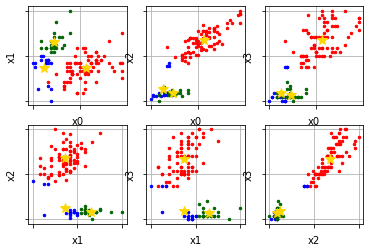

[[0.558 0.365 0.678 0.675]
 [0.123 0.366 0.125 0.09 ]
 [0.229 0.655 0.085 0.068]]
28.22818505505671
KMEDOID
[[0.194 0.583 0.085 0.042]
 [0.611 0.417 0.712 0.792]
 [0.417 0.292 0.492 0.458]]
23.812317031831324


In [146]:
# kmeans
print('KMEANS')
centers = kmeans_plusplus_initializer(X_train_sv, 3).initialize()
# klasterisasi
kmeans_instance = kmeans(X_train_sv, centers, metric=minkowski_metric)
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()
sse = kmeans_instance.get_total_wce()
# visualisasi
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, X_train_sv)
visualizer.append_cluster(final_centers, None, marker='*', markersize=10)
visualizer.show(max_row_size=3)
# hasil
print(np.round(np.array(final_centers),3))
print(sse)

# # kmedloid
print('KMEDOID')
kmedoids = KMedoids(n_clusters=3, random_state=0,metric='minkowski').fit(X_train_sv)
# print(kmedoids.labels_)
# print(kmedoids.predict(X_test_sv))
# print(y_test_sv)
print(np.round(np.array(kmedoids.cluster_centers_),3))
print(kmedoids.inertia_)

KMEANS


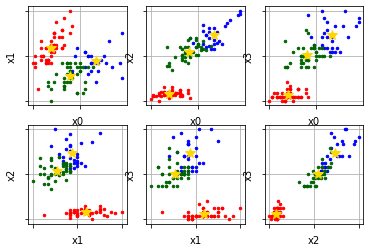

[[0.196 0.591 0.079 0.06 ]
 [0.664 0.442 0.735 0.734]
 [0.397 0.27  0.543 0.505]]
22.76160957125912
KMEDOID
[[0.194 0.583 0.085 0.042]
 [0.361 0.292 0.542 0.5  ]
 [0.667 0.417 0.678 0.667]]
22.83761584807452


In [174]:
# CROSS VALIDATION

# kmeans
print('KMEANS')
centers = kmeans_plusplus_initializer(X_train_cv, 3).initialize()
# klasterisasi
kmeans_instance = kmeans(X_train_cv, centers, metric=euclidean_metric)
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()
sse = kmeans_instance.get_total_wce()
# visualisasi
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, X_train_cv)
visualizer.append_cluster(final_centers, None, marker='*', markersize=10)
visualizer.show(max_row_size=3)
# hasil
print(np.round(np.array(final_centers),3))
print(sse)

# # kmedloid
print('KMEDOID')
kmedoids = KMedoids(n_clusters=3, random_state=0,metric='euclidean').fit(X_train_cv)
# print(kmedoids.labels_)
# print(kmedoids.predict(X_test_cv))
# print(y_test_cv)
print(np.round(np.array(kmedoids.cluster_centers_),3))
print(kmedoids.inertia_)